In [25]:
import glob, os
studydir = "/home/tsilande/study/qNML"
runrd = os.path.join(studydir,'all5/res')
resd = "all5/rankres"

scores = 'BIC qNML fNML BDeu'.split()
scorecols = dict(zip(scores,range(1,5)))
sss = [25,50,100,200,400,800,1000]
scorecols

{'BDeu': 4, 'BIC': 1, 'fNML': 3, 'qNML': 2}

In [26]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/opt/STools/python/2.7-x86_64/lib/python2.7/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['product']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [27]:
import numpy as np

Load one prediction column

In [28]:
import numpy as np

def onerep(fn,col):
    a = np.fromfile(fn,sep=' ').reshape(-1,5)
    return a[:,col]

def one_dat(k,g,t,s):
    fmt=os.path.join(runrd,'k%d_%d_%s_x*'%(k,g,t))
    col = scorecols[s]
    return np.vstack(onerep(fn,col) for fn in glob.glob(fmt))

one_dat(4,10,'Jeff','BDeu').shape

(100, 7)

In [29]:
def all_dat(k,t,s):
    return np.vstack(one_dat(k,g,t,s) for g in range(100))

In [30]:
from itertools import product

In [31]:
lstyle = {'BIC':'-.','BDeu':':', 'fNML':'--', 'qNML':'-'}

### WARNING, A SLOW CELL 

In [36]:
datas={}
for (k, t) in product((4,7),('Jeff','BDeu')):
    for s in 'BIC BDeu fNML qNML'.split():
        print(k,t,s)
        datas[(k,t,s)] = all_dat(k,t,s)

(4, 'Jeff', 'BIC')
(4, 'Jeff', 'BDeu')
(4, 'Jeff', 'fNML')
(4, 'Jeff', 'qNML')
(4, 'BDeu', 'BIC')
(4, 'BDeu', 'BDeu')
(4, 'BDeu', 'fNML')
(4, 'BDeu', 'qNML')
(7, 'Jeff', 'BIC')
(7, 'Jeff', 'BDeu')
(7, 'Jeff', 'fNML')
(7, 'Jeff', 'qNML')
(7, 'BDeu', 'BIC')
(7, 'BDeu', 'BDeu')
(7, 'BDeu', 'fNML')
(7, 'BDeu', 'qNML')


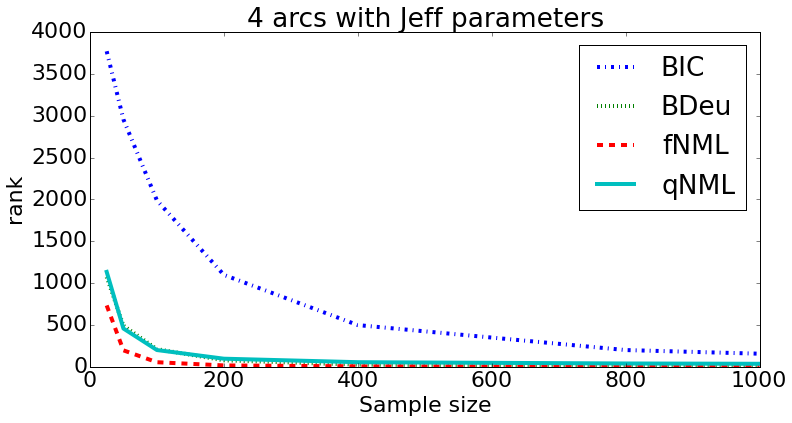

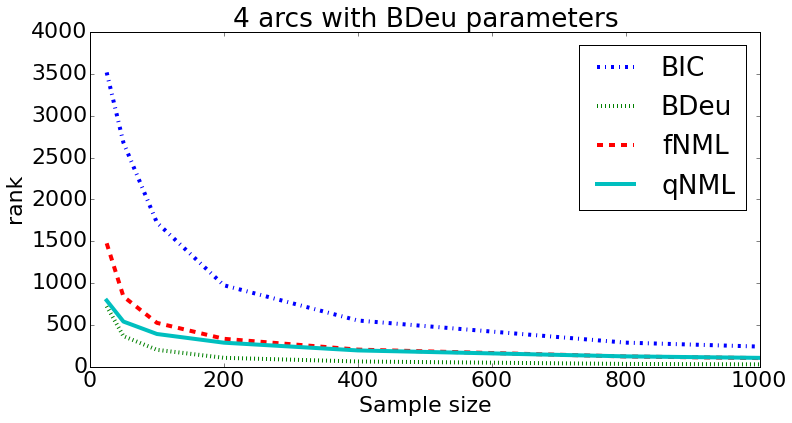

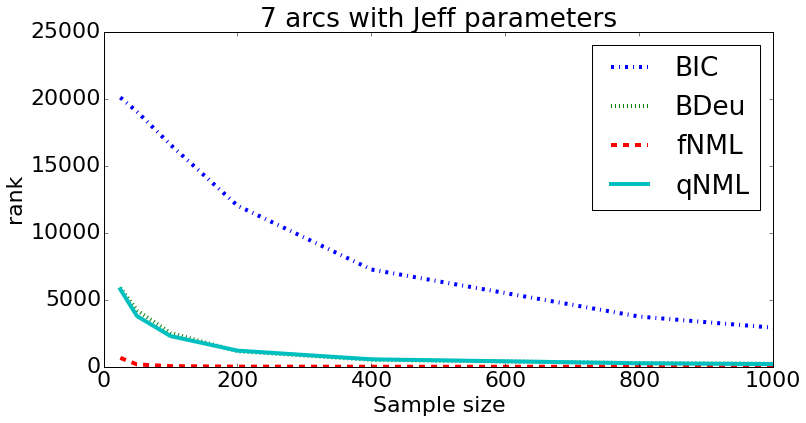

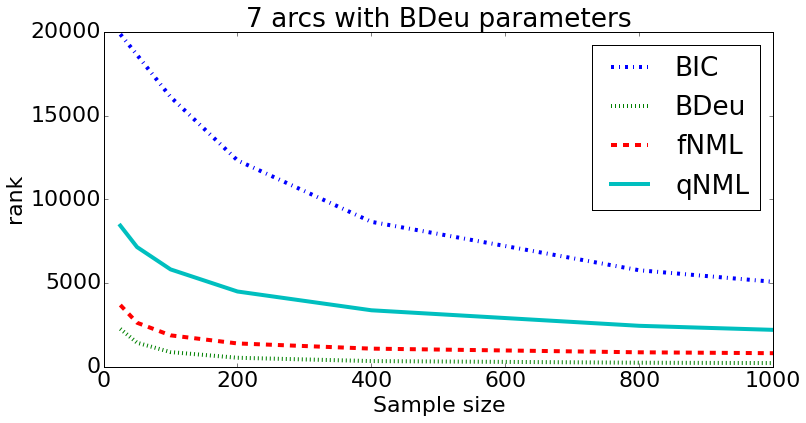

In [40]:
for (k, t) in product((4,7),('Jeff','BDeu')):
    plt.figure(figsize=(12,6))
    plt.rcParams.update({'font.size':22})
    plt.title('%d arcs with %s parameters' % (k,t))
    plt.xlabel('Sample size')
    plt.ylabel('rank')
    for s in 'BIC BDeu fNML qNML'.split():
        ds = datas[k,t,s]
        plt.plot(sss,ds.mean(axis=0),lw=4,linestyle=lstyle[s],label=s)
    plt.legend(loc='upper right')
    plt.savefig('qNML_images/art%d_%s_mean.pdf' % (k,t), bbox_inches='tight')
        